<a href="https://colab.research.google.com/github/nikhilapanyam/Neuroscience/blob/main/drosophilaTracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [25]:
#@title Click to import libraries
import cv2 as cv
import os
import matplotlib.pyplot as plt
import numpy as np
import glob
import pandas as pd

In [30]:
tempVid = '/content/drive/MyDrive/thebest_group/thebest_group_Drosophila_C_flowrersss1_2025-01-16_13-48-26.avi'
in1 = cv.VideoCapture(tempVid)

In [31]:
readIn,frame = in1.read()

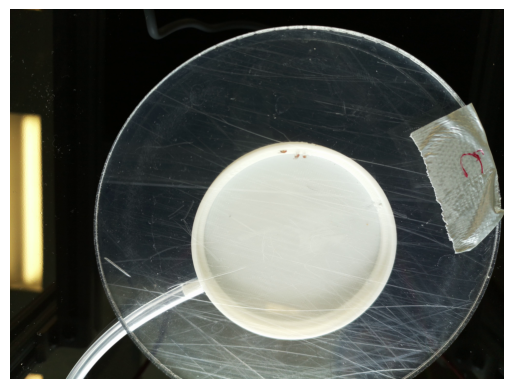

In [32]:
readIn, frame = in1.read()
if not readIn:
    print("Error: Could not read frame from video")
else:
    plt.imshow(frame[:, :, ::-1])  # Convert BGR to RGB
    plt.axis('off')
    plt.show()


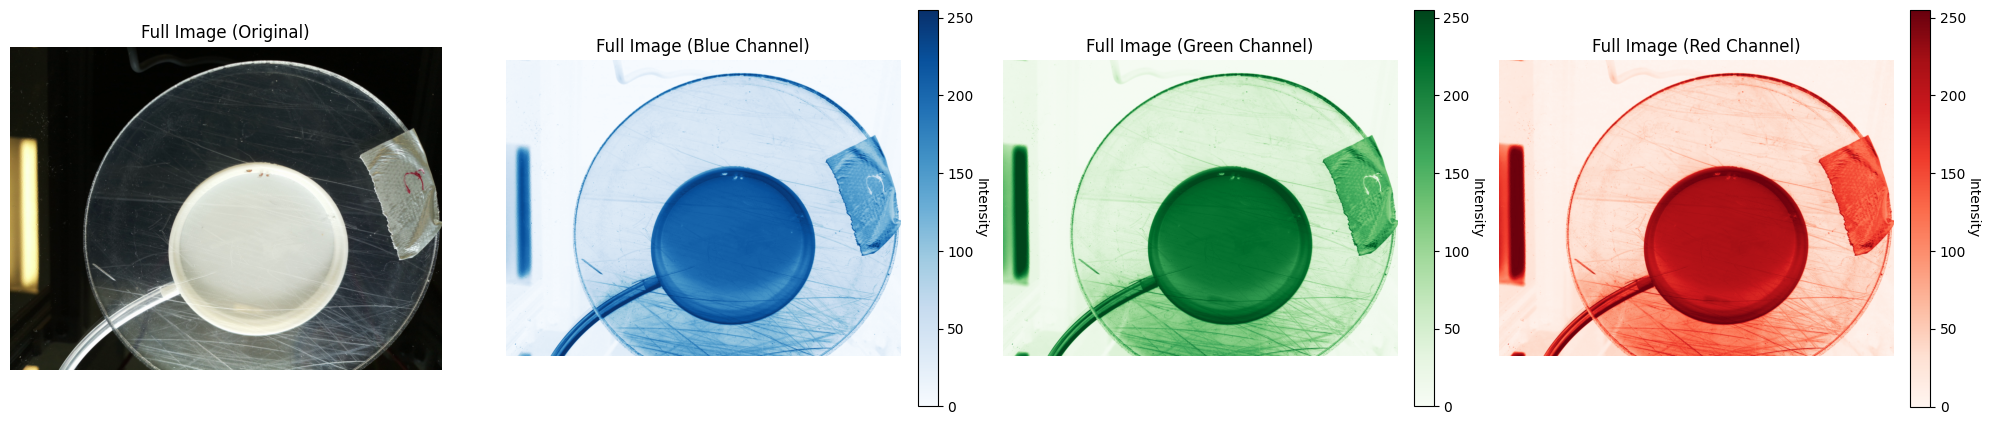

In [33]:
#We'll start by reloading the first image we worked with:

# Convert the image to OpenCV format (NumPy array)
image = frame.copy()#cv.cvtColor(frame, cv.COLOR_RGB2BGR)  # Ensure OpenCV format

# Crop the upper-left 100x100 pixels
#cropped_image = image[300:700, 300:700,]


# Separate the color channels of the cropped image
#cropped_blue_channel = cropped_image[:, :, 0]  # Blue
#cropped_green_channel = cropped_image[:, :, 1]  # Green
#cropped_red_channel = cropped_image[:, :, 2]  # Red

# Separate the color channels of the full image
blue_channel = image[:, :, 0]
green_channel = image[:, :, 1]
red_channel = image[:, :, 2]

# Function to add a color bar
def plot_with_colorbar(ax, data, cmap, title):
    img = ax.imshow(data, cmap=cmap, vmin=0, vmax=255)
    ax.set_title(title)
    ax.axis("off")
    cbar = plt.colorbar(img, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label("Intensity", rotation=270, labelpad=10)

# Plot the cropped image and its color channels
fig, axs = plt.subplots(1, 4, figsize=(20, 10))


# Full images
axs[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
axs[0].set_title("Full Image (Original)")
axs[0].axis("off")

plot_with_colorbar(axs[1], blue_channel, "Blues", "Full Image (Blue Channel)")
plot_with_colorbar(axs[2], green_channel, "Greens", "Full Image (Green Channel)")
plot_with_colorbar(axs[3], red_channel, "Reds", "Full Image (Red Channel)")

plt.tight_layout()
plt.show()


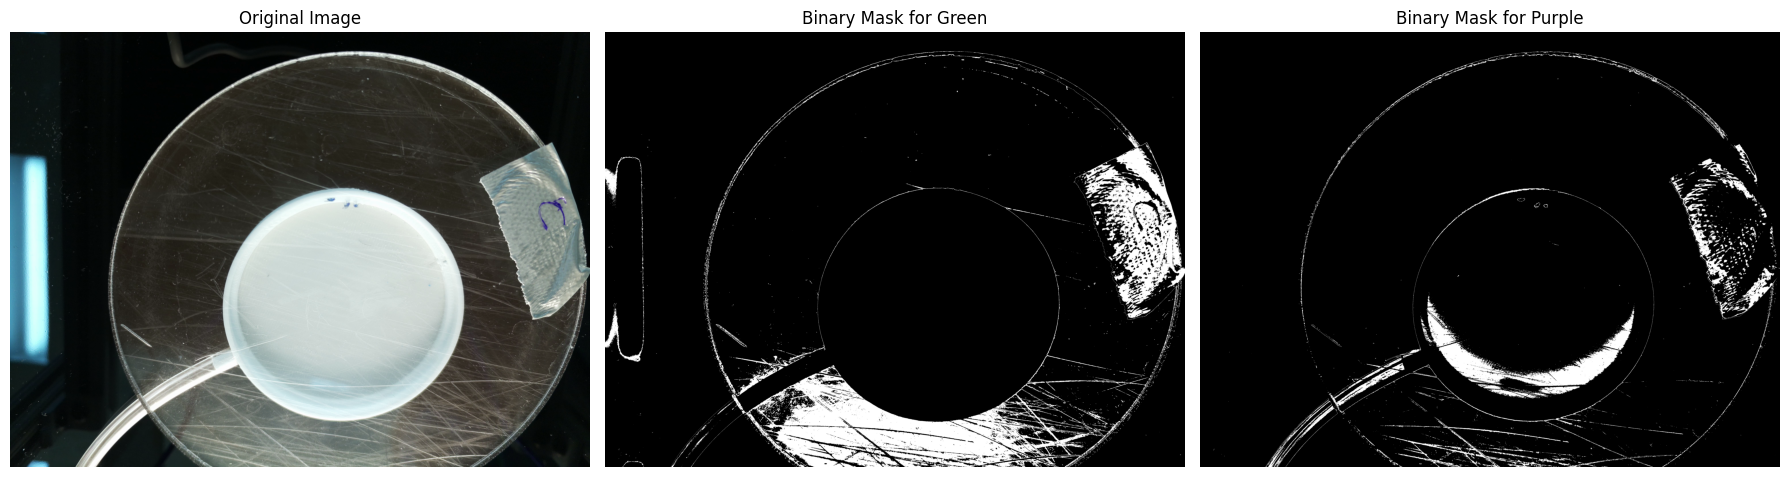

In [34]:
# Create binary mask for green
red_mask = (image[:, :, 0] < 150) & (image[:, :, 1] > 100) & (image[:, :, 2] < 150)
red_mask = red_mask.astype(np.uint8) * 255  # Convert to binary format (0 or 255)

# Create binary mask for purple (Looks for high values in both red AND blue channels)
purple_mask = (image[:, :, 0] > 150) & (image[:, :, 1] < 200) & (image[:, :, 2] > 150)
purple_mask = purple_mask.astype(np.uint8) * 255  # Convert to binary format (0 or 255)

# Display the original image and binary masks
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Original image
axs[0].imshow(image)
axs[0].set_title("Original Image")
axs[0].axis("off")

# Red mask
axs[1].imshow(red_mask, cmap="gray")
axs[1].set_title("Binary Mask for Green")
axs[1].axis("off")

# Purple mask
axs[2].imshow(purple_mask, cmap="gray")
axs[2].set_title("Binary Mask for Purple")
axs[2].axis("off")

plt.tight_layout()
plt.show()

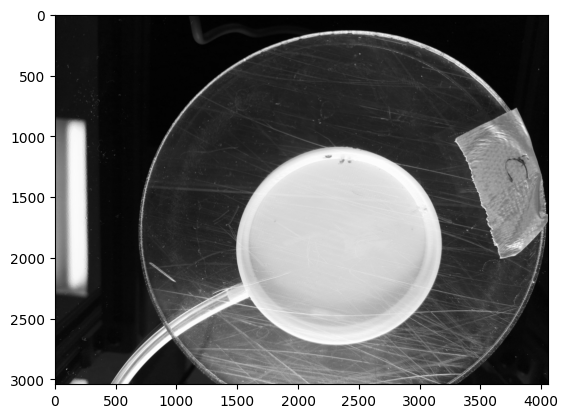

In [35]:
tempIm = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
plt.imshow(tempIm,cmap=plt.cm.gray)

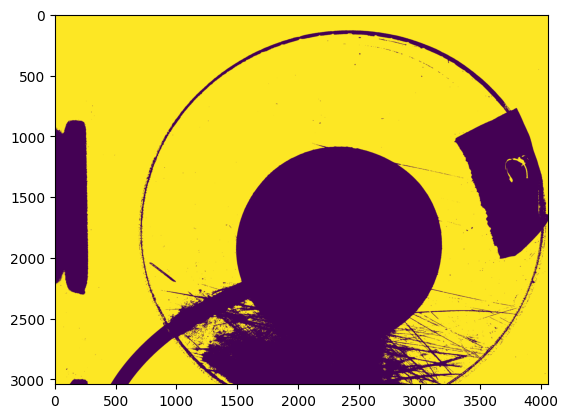

In [36]:
# black and white thresholding
plt.imshow(tempIm<100)
binaryThreshold = (tempIm<100).astype(np.uint8)

(-0.5, 4055.5, 3039.5, -0.5)

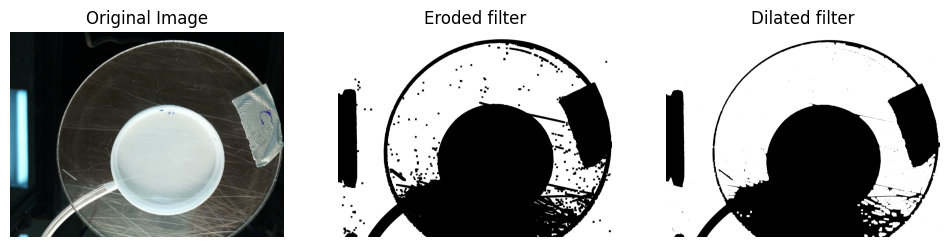

In [37]:
# Define a kernel for morphological operations
kernel = np.ones((25, 25), np.uint8)  # 10x10 square kernel

# Apply erosion to remove small white noise
eroded_mask = cv.erode(binaryThreshold, kernel, iterations=1)

# Apply dilation to restore the shape of larger regions
dilated_mask = cv.dilate(eroded_mask, kernel, iterations=1)

# Display the original mask and cleaned-up versions in a 2x2 layout
fig, axs = plt.subplots(1, 3, figsize=(12, 12))

# Original image
axs[0].imshow(image)
axs[0].set_title("Original Image")
axs[0].axis("off")

# Original purple mask
axs[1].imshow(eroded_mask, cmap="gray")
axs[1].set_title("Eroded filter")
axs[1].axis("off")

# Original purple mask
axs[2].imshow(dilated_mask, cmap="gray")
axs[2].set_title("Dilated filter")
axs[2].axis("off")

In [38]:
frame = image.copy()
# Find contours in the binary mask
contours, _ = cv.findContours(dilated_mask, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# Loop through each detected contour
for contour in contours:
    # Skip small contours (less than the specified area threshold)
    if cv.contourArea(contour) > 7000 or cv.contourArea(contour) < 1500:
        continue
    x, y, w, h = cv.boundingRect(contour)

    # Draw a rectangle around the detected green object
    cv.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 6)

# Display the original frame with bounding boxes
cv.imwrite('/content/flyTracker.jpg', frame)

True

In [39]:
np.shape(frame)

(3040, 4056, 3)

In [40]:
kernel = np.ones((25, 25), np.uint8)  # 10x10 square kernel

vid1 = cv.VideoWriter('/content/flyTracker.avi',cv.VideoWriter_fourcc('M','J','P','G'),10,(4056,3040))
flyOut = {}


for ff in range(0,5):
  flyOut['fly'+str(ff)+'x'] = np.zeros(101)
  flyOut['fly'+str(ff)+'y'] = np.zeros(101)


for elee in range(0,100):

  readIn,image = in1.read()
  tempIm = cv.cvtColor(image,cv.COLOR_BGR2GRAY) < 100
  binaryThreshold = (tempIm).astype(np.uint8)

  # Apply erosion to remove small white noise
  eroded_mask = cv.erode(binaryThreshold, kernel, iterations=1)

  # Apply dilation to restore the shape of larger regions
  dilated_mask = cv.dilate(eroded_mask, kernel, iterations=1)


  contours, _ = cv.findContours(dilated_mask, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
  flycnt = 0
  # Loop through each detected contour
  for contour in contours:
      # Skip small contours (less than the specified area threshold)
      if cv.contourArea(contour) > 7000 or cv.contourArea(contour) < 1500:
          continue
      x, y, w, h = cv.boundingRect(contour)

      xx = []
      yy= []
      for ele in np.squeeze(contour):
        xx.append(ele[0])
        yy.append(ele[1])
      xx = np.nanmean(xx)
      yy = np.nanmean(yy)

      tN = 'fly'+str(flycnt)

      #if tN+'x' not in flyOut:
      #  flyOut[tN+'x'] = []
      #  flyOut[tN+'y'] = []

      flyOut[tN+'x'][elee] = xx#.append(xx)
      flyOut[tN+'y'][elee] = yy#.append(yy)


      flycnt+=1
      # Draw a rectangle around the detected green object
      cv.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 6)



  flycnt=0
  # Display the original frame with bounding boxes
  vid1.write(image)
vid1.release()

KeyError: 'fly5x'

In [41]:
import cv2 as cv
import numpy as np

kernel = np.ones((25, 25), np.uint8)  # 25x25 square kernel

vid1 = cv.VideoWriter('/content/flyTracker.avi', cv.VideoWriter_fourcc(*'MJPG'), 10, (4056, 3040))
flyOut = {}

# Initialize the first 5 flies
for ff in range(5):  # range(0,5) is the same as range(5)
    flyOut[f'fly{ff}x'] = np.zeros(101)
    flyOut[f'fly{ff}y'] = np.zeros(101)

for elee in range(100):  # Loop over 100 frames

    readIn, image = in1.read()
    if not readIn:
        print(f"Error: Could not read frame {elee}")
        break  # Stop if the video ends

    tempIm = cv.cvtColor(image, cv.COLOR_BGR2GRAY) < 100
    binaryThreshold = tempIm.astype(np.uint8)

    # Apply erosion and dilation to clean up the mask
    eroded_mask = cv.erode(binaryThreshold, kernel, iterations=1)
    dilated_mask = cv.dilate(eroded_mask, kernel, iterations=1)

    contours, _ = cv.findContours(dilated_mask, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    flycnt = 0  # Reset fly counter per frame

    # Loop through each detected contour
    for contour in contours:
        area = cv.contourArea(contour)
        if area > 7000 or area < 1500:  # Skip if too big or too small
            continue

        x, y, w, h = cv.boundingRect(contour)

        xx = np.nanmean(contour[:, 0, 0])  # Compute mean x-coordinate
        yy = np.nanmean(contour[:, 0, 1])  # Compute mean y-coordinate

        tN = f'fly{flycnt}'  # Generate fly ID

        # If fly ID is new, initialize it
        if tN+'x' not in flyOut:
            flyOut[tN+'x'] = np.zeros(101)  # Avoid KeyError
            flyOut[tN+'y'] = np.zeros(101)

        flyOut[tN+'x'][elee] = xx
        flyOut[tN+'y'][elee] = yy

        flycnt += 1  # Increment fly count
        cv.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 6)  # Draw bounding box

    vid1.write(image)  # Save frame to video

vid1.release()


In [42]:
flyOut.keys()

dict_keys(['fly0x', 'fly0y', 'fly1x', 'fly1y', 'fly2x', 'fly2y', 'fly3x', 'fly3y', 'fly4x', 'fly4y', 'fly5x', 'fly5y', 'fly6x', 'fly6y', 'fly7x', 'fly7y', 'fly8x', 'fly8y', 'fly9x', 'fly9y', 'fly10x', 'fly10y', 'fly11x', 'fly11y', 'fly12x', 'fly12y', 'fly13x', 'fly13y', 'fly14x', 'fly14y', 'fly15x', 'fly15y'])

In [43]:
import pandas as pd

In [44]:
for ele in flyOut.keys():
  print(len(flyOut[ele]))
len(flyOut['fly1y'])

101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101


101

In [45]:
csvOut = pd.DataFrame.from_dict(flyOut)
csvOut.to_csv('/content/flyTracker.csv')

In [46]:
csvOut

,fly0x,fly0y,fly1x,fly1y,fly2x,fly2y,fly3x,fly3y,fly4x,fly4y,...,fly11x,fly11y,fly12x,fly12y,fly13x,fly13y,fly14x,fly14y,fly15x,fly15y
0,2963.120000,3015.040000,3208.779221,3007.597403,3182.478261,2917.000000,3305.359375,2924.156250,3090.902439,2822.024390,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,2964.000000,3015.846154,3207.525000,3007.487500,3181.041667,2918.500000,3305.750000,2923.640625,3091.860465,2823.116279,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,2962.160000,3019.160000,3207.133333,3007.680000,3183.928571,2920.500000,3299.880597,2921.955224,3197.344828,2820.448276,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,2973.884615,3017.576923,3204.894737,3008.736842,3180.880000,2918.760000,3190.156863,2827.176471,3096.196429,2819.071429,...,2941.610000,2538.450000,3762.823529,2441.676471,883.407692,2122.792308,0.0,0.0,0.0,0.0
4,2966.294118,3018.411765,3210.823529,3006.617647,3183.551724,2916.241379,3191.372549,2822.960784,3091.948276,2818.586207,...,2943.173469,2539.887755,3762.151515,2441.333333,882.413127,2122.200772,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,3434.476190,2858.571429,3385.071429,2704.892857,1221.000000,2713.952381,3153.630435,2659.304348,1087.428571,2690.107143,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
97,3434.222222,2856.277778,3384.285714,2704.214286,3153.586957,2659.304348,1085.896552,2690.741379,1243.000000,2687.239130,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
98,3434.222222,2856.277778,3384.357143,2704.214286,1107.551724,2711.655172,3153.630435,2659.304348,1060.300000,2664.350000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
99,3437.437500,2855.000000,3384.518519,2703.407407,3153.456522,2659.282609,1060.818182,2668.045455,1243.104167,2684.979167,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
